# Import Data and Packages

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)
pd.set_option('display.width',1999)


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data_Id = train_data['Id']
train_data.drop('Id', axis = 1, inplace = True)

test_data_Id = test_data['Id']
test_data.drop('Id', axis = 1, inplace = True)


train_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [129]:
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


# Visualize Numeric Distributions

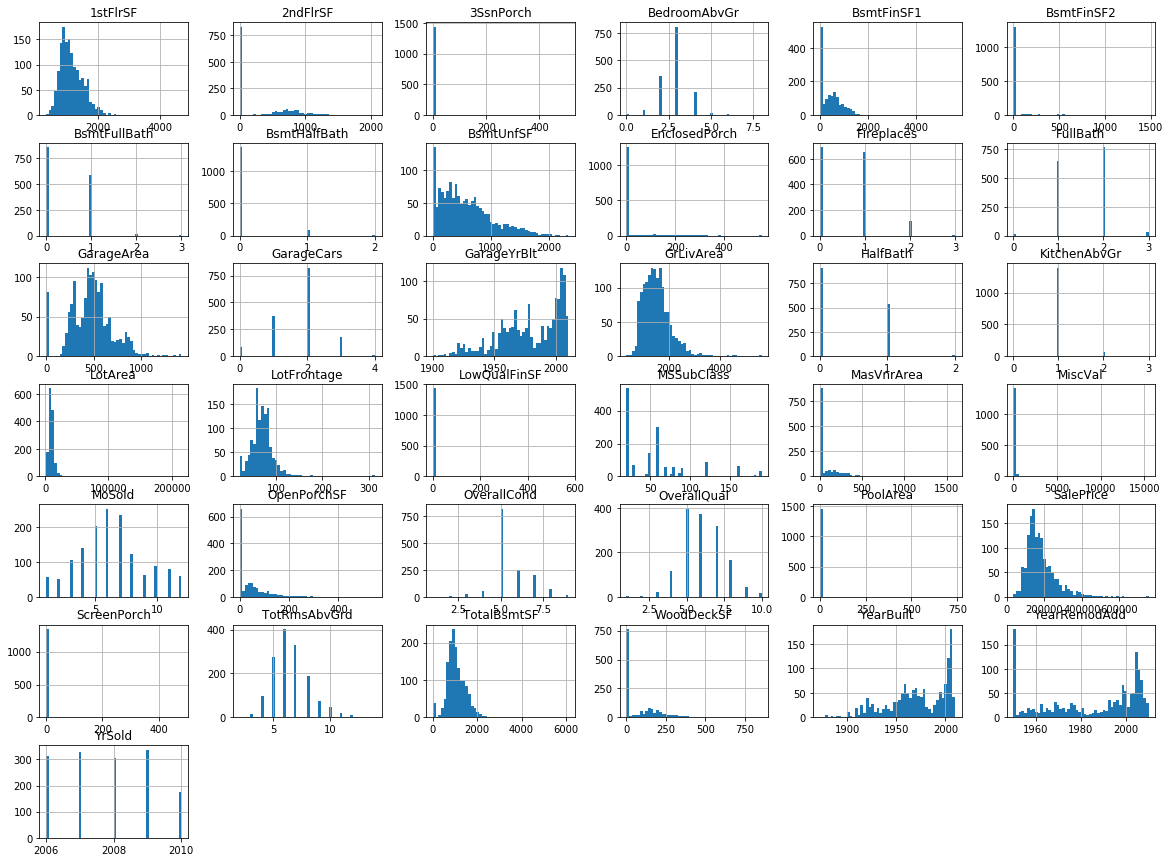

In [130]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

Firstly, saleprice has a lot of high valued data points and is right skewed. According to https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55, a log transformation can be used to correct right skew.

## Visualize Relatonship Between Variables

In [131]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_numeric = train_data.select_dtypes(include=numerics)

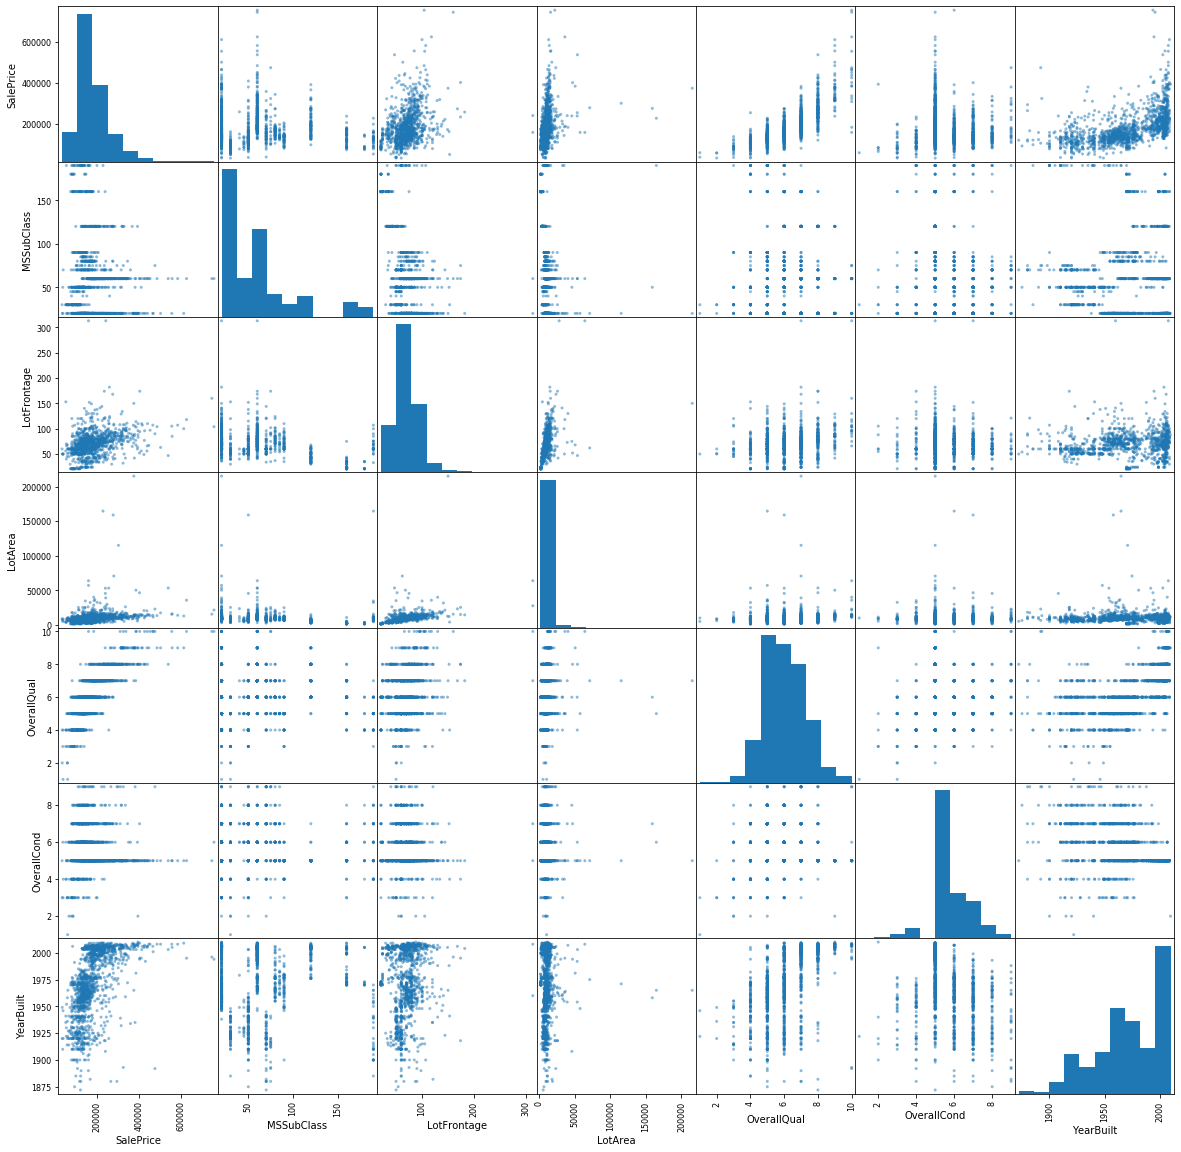

In [132]:
from pandas.plotting import scatter_matrix
attributes1 = train_numeric.columns[[36 , 0 , 1 ,2 ,3, 4, 5]]
_ = scatter_matrix(train_data[attributes1], figsize=(20, 20))

When looking at SalePrice vs 'x variable', LotFrontage and LotArea seem to have outliers. 

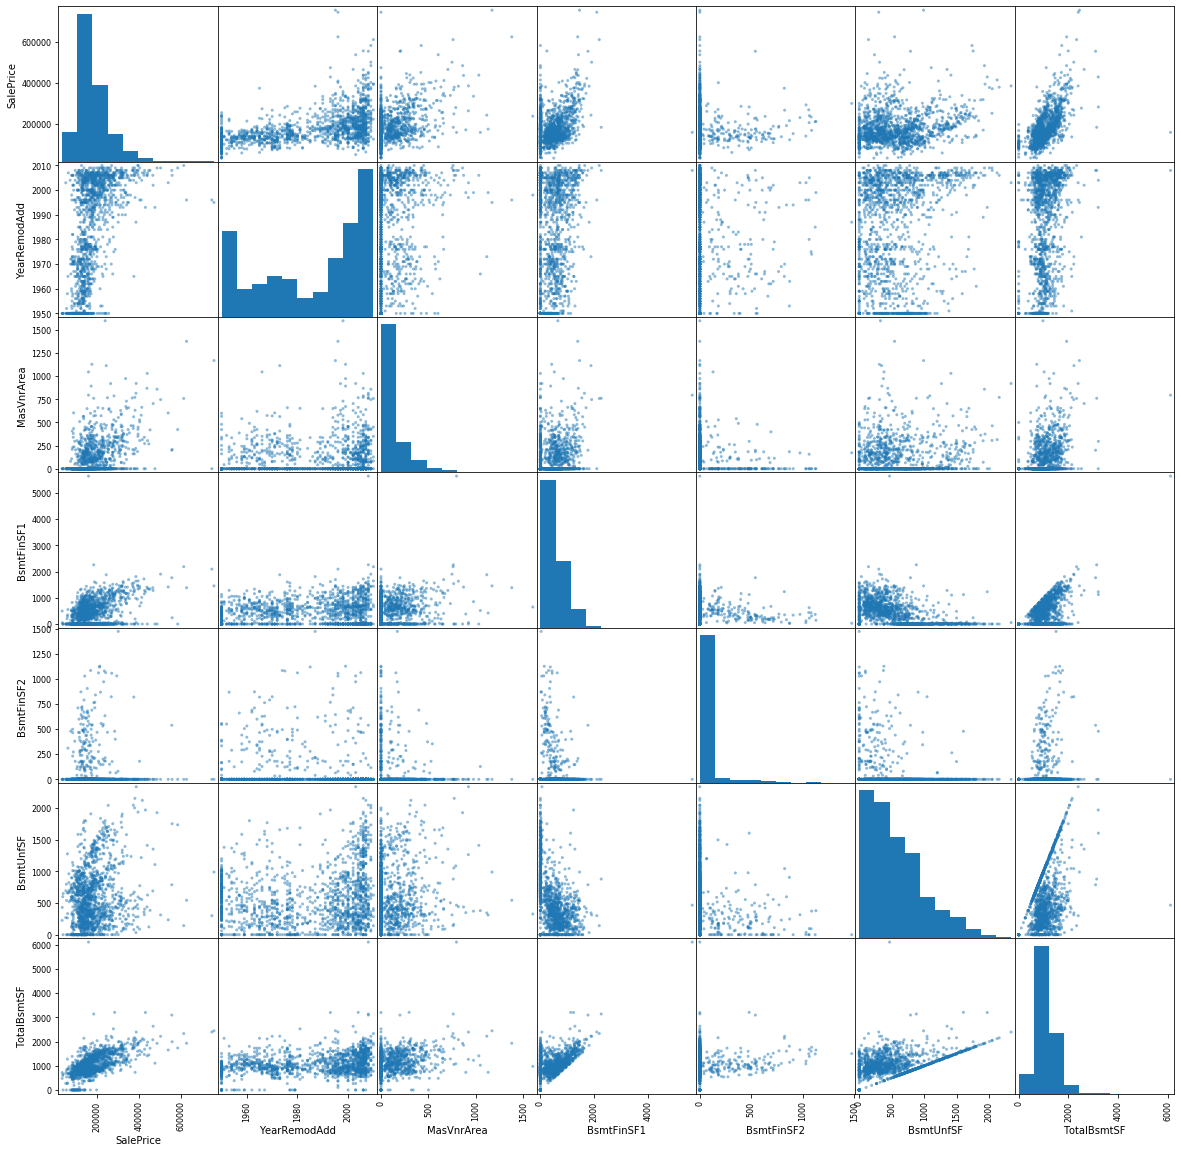

In [133]:
attributes2 = train_numeric.columns[[36,6,7,8,9,10,11]]
_ = scatter_matrix(train_data[attributes2], figsize=(20, 20))

When looking at SalePrice vs 'x variable', MasVnrArea, BsmtFinSF2, TotalBsmtSF, and BsmtFinSF1 seem to have outliers. 

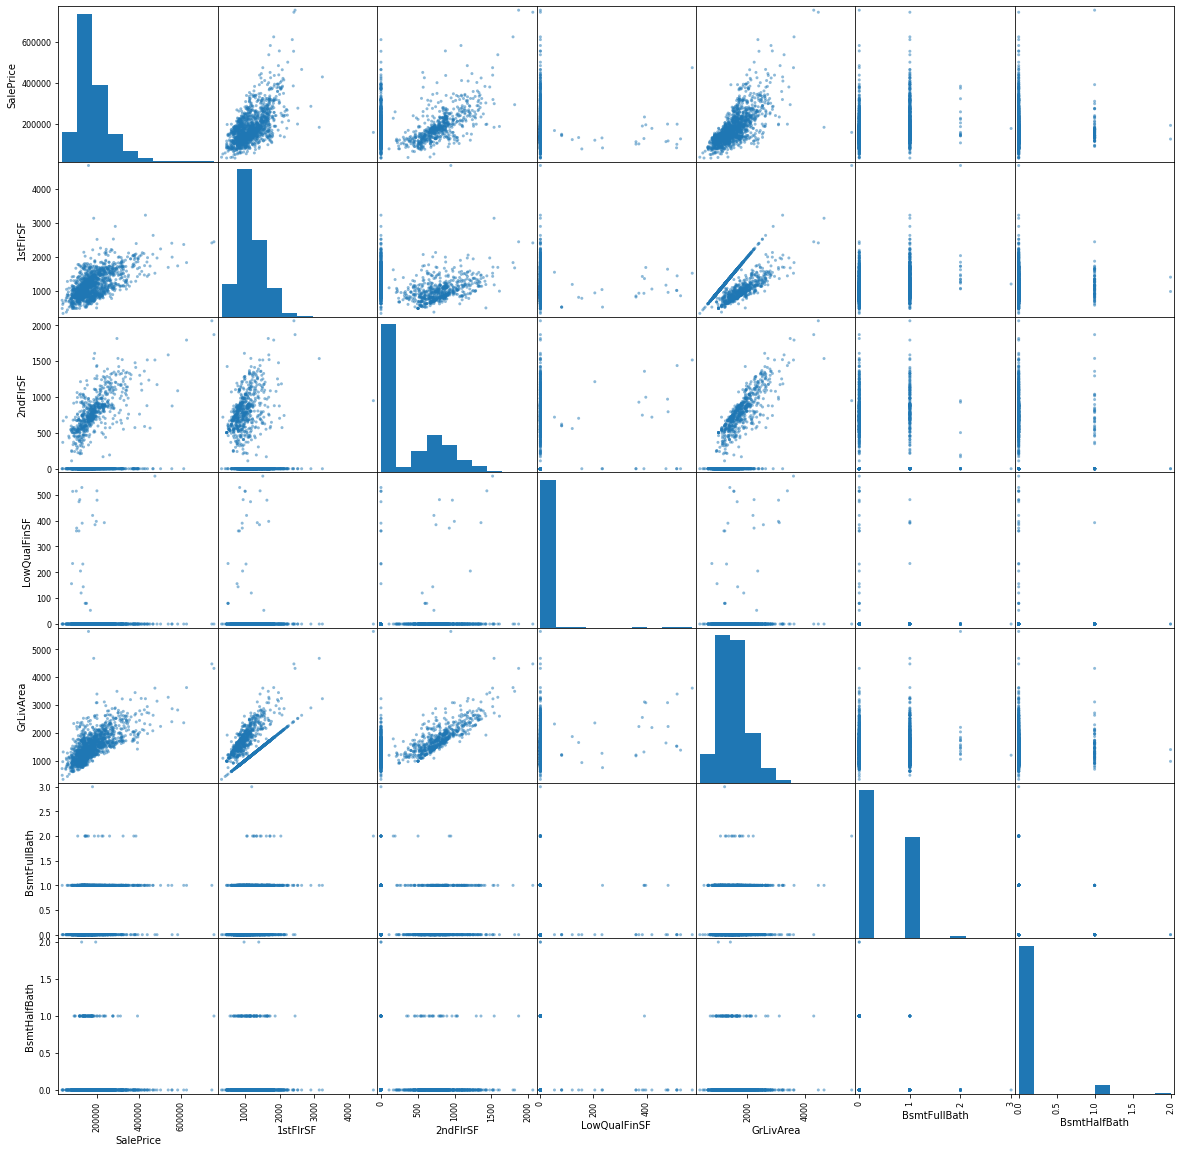

In [134]:
attributes3 = train_numeric.columns[[36,12,13,14,15,16,17]]
_ = scatter_matrix(train_data[attributes3], figsize=(20, 20))

When looking at SalePrice vs 'x variable', 1stFlrSF and GrlivArea seem to have outliers. 

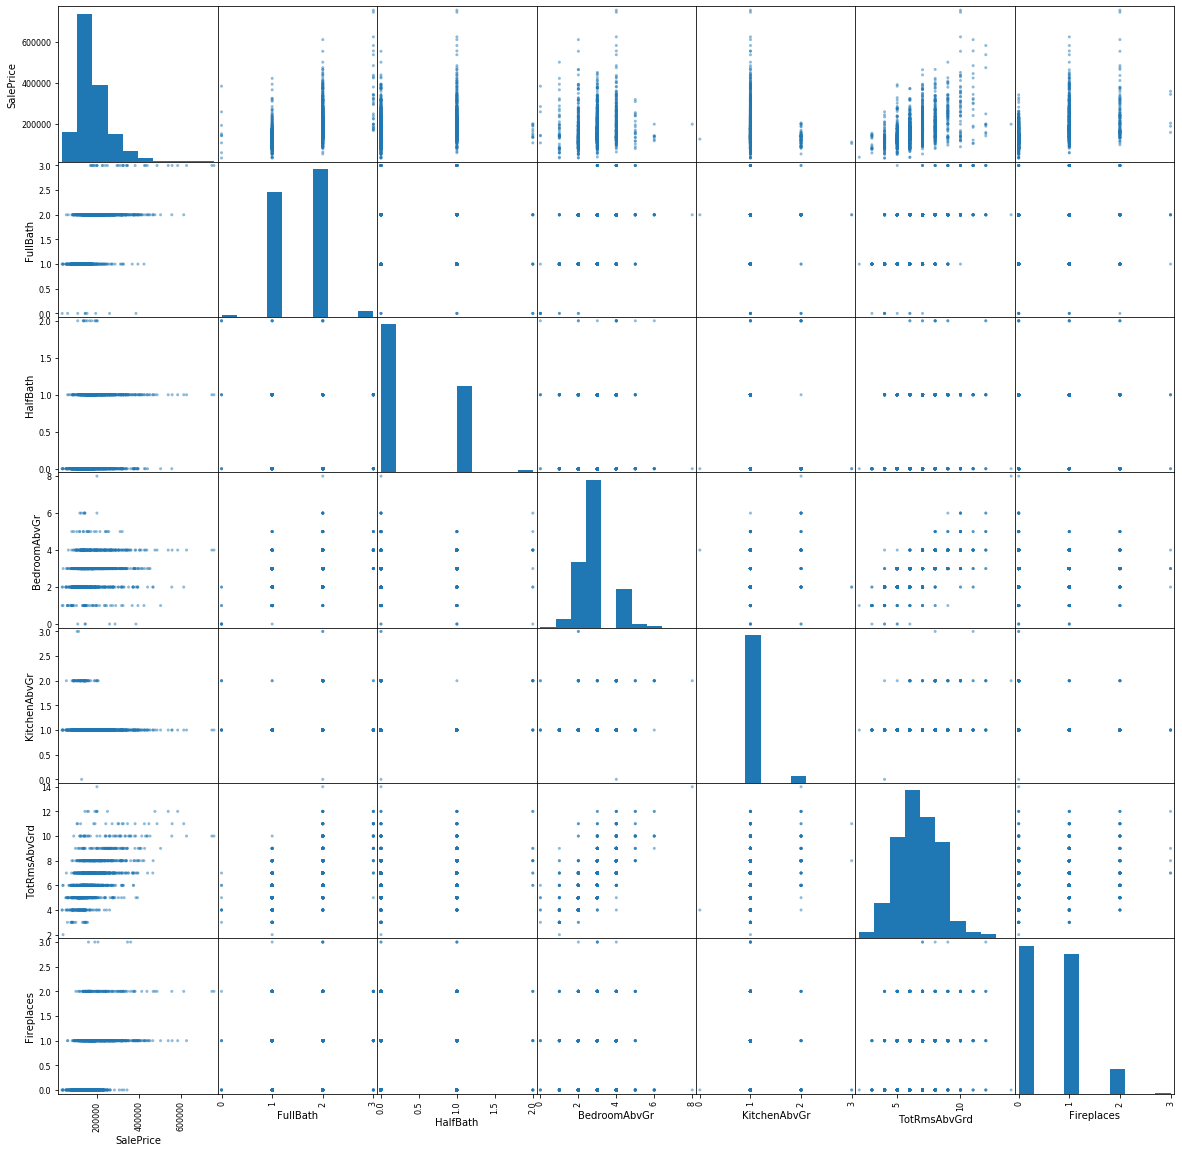

In [135]:
attributes4 = train_numeric.columns[[36,18,19,20,21,22,23]]
_ = scatter_matrix(train_data[attributes4], figsize=(20, 20))

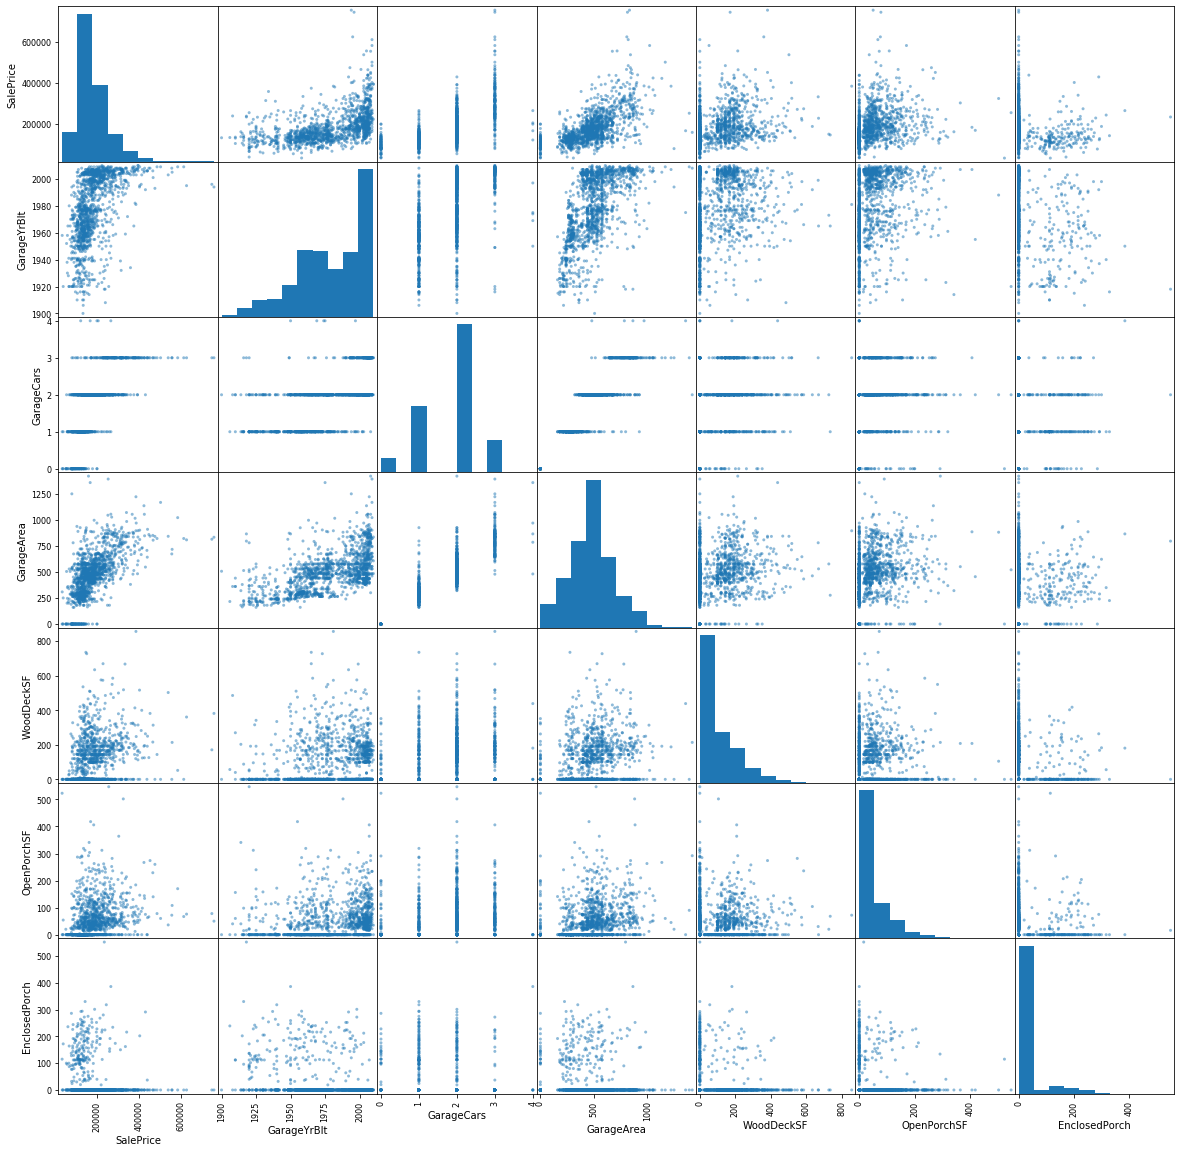

In [136]:
attributes5 = train_numeric.columns[[36,24,25,26,27,28,29]]
_ = scatter_matrix(train_data[attributes5], figsize=(20, 20))

When looking at SalePrice vs 'x variable', GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, and EnclosedPorch seem to have outliers. 

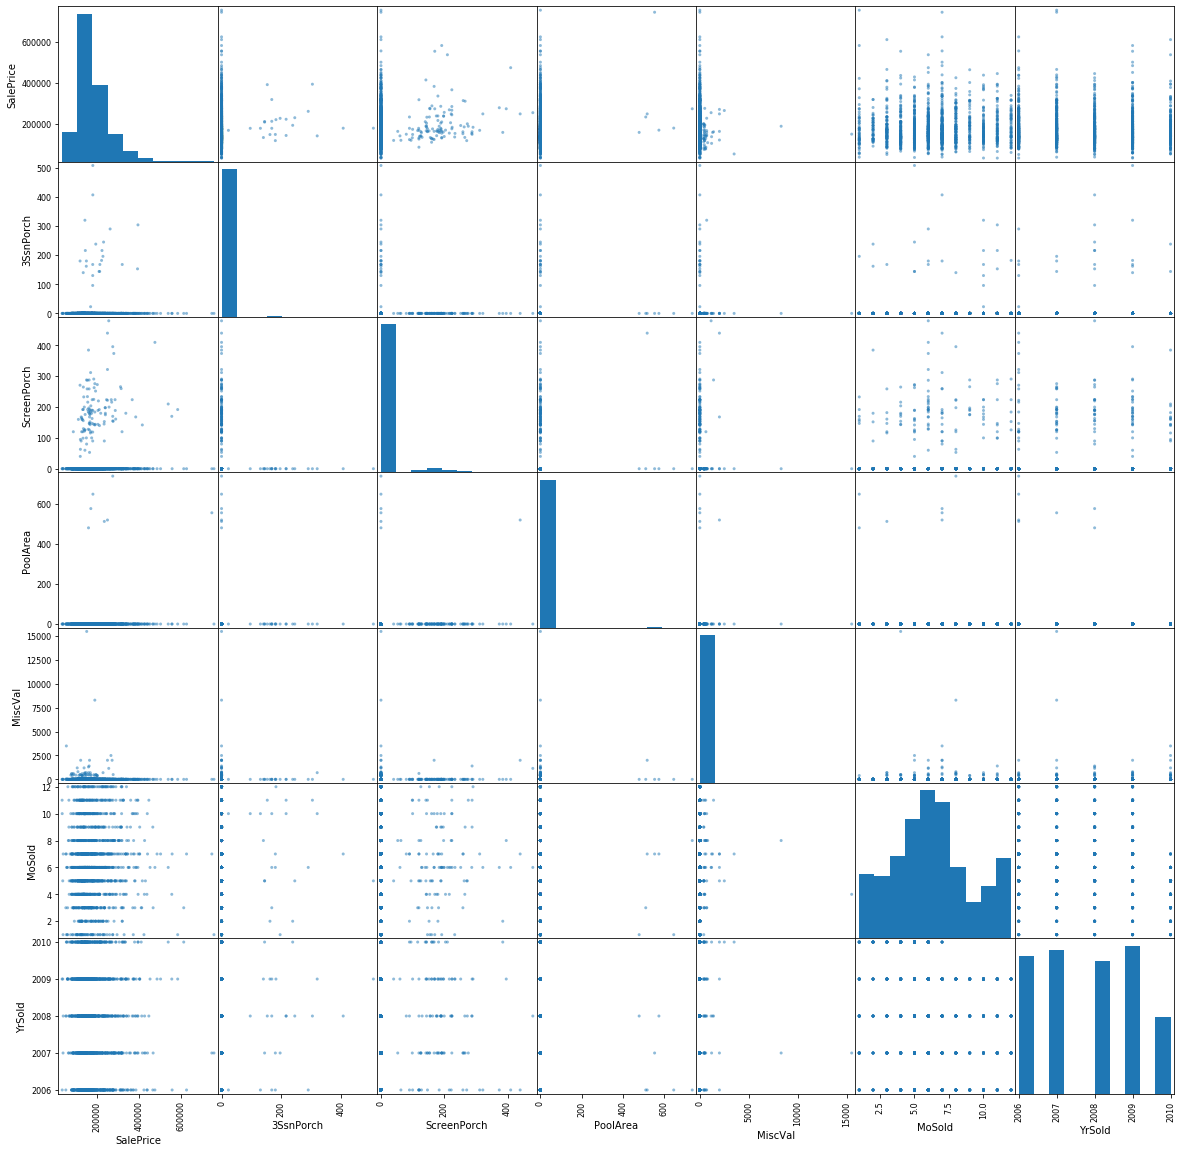

In [137]:
attributes6 = train_numeric.columns[[36,30,31,32,33,34,35]]
_ = scatter_matrix(train_data[attributes6], figsize=(20, 20))

In [138]:
# Chech Correlation withSalePrice
corrs=train_numeric.corr()
print(corrs['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


According to the data, most infulential parameters on SalePrice are OverallQual and GrLivArea. Must remove outliers in top 6 variables.

# Clean Up Data

In [516]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data_Id = train_data['Id']
train_data.drop('Id', axis = 1, inplace = True)

test_data_Id = test_data['Id']
test_data.drop('Id', axis = 1, inplace = True)

#Based on results above, remove outliers
idel = train_data[train_data['GrLivArea']>4500].index
train_data = train_data.drop(idel, axis=0)
idel = train_data[train_data['LotFrontage']>200].index
train_data = train_data.drop(idel, axis=0)
idel = train_data[train_data['LotArea']>100000].index
train_data = train_data.drop(idel, axis=0)
idel = train_data[train_data['TotalBsmtSF']>4000].index
train_data = train_data.drop(idel, axis=0)

idel = train_data[train_data['1stFlrSF']>4000].index
train_data = train_data.drop(idel, axis=0)

idel = train_data[train_data['GarageCars']>3].index
#train_data = train_data.drop(idel, axis=0)
idel = train_data[train_data['GarageArea']>1250].index
#train_data = train_data.drop(idel, axis=0)

# Make new df for numeric vs categ, combine rest for training
train_numeric = train_data.select_dtypes(include=numerics)
train_categ = train_data.select_dtypes(exclude=numerics)
alldata = pd.concat([train_data,test_data], ignore_index=True);

C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Deletion and Conversion

In [517]:
# Delete based on low correlation (later found deleting fewer columns reduced CV score)
#delcols=['MiscFeature','KitchenAbvGr','MSSubClass', 'BedroomAbvGr', 'KitchenAbvGr' ,'EnclosedPorch' ,'3SsnPorch' ,'PoolArea' ,'MoSold' ,'MiscVal' ,'LowQualFinSF' ,'BsmtFinSF2' ,'YrSold' ,'BsmtFinSF1','PoolQC','Alley','FireplaceQu','Fence']
# delcols=['MSSubClass','EnclosedPorch' ,'3SsnPorch' ,'PoolArea' ,'MoSold' ,'MiscVal' ,'PoolQC']
#delcols=['PoolArea' ,'MiscVal' ,'PoolQC','Alley','FireplaceQu','Fence','MiscFeature']
delcols=['PoolArea' ,'MiscVal' ,'PoolQC','MiscFeature']

yearcols=['YearBuilt','YearRemodAdd','GarageYrBlt']
# ordcols=['LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond'];
ordcols=['LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond'];
ohcols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','GarageType','PavedDrive','SaleType','SaleCondition']

# Drop features of MiscFeature because of large amount of NaNs 
train_data.drop(delcols, axis = 1,inplace=True )
test_data.drop(delcols, axis = 1,inplace=True)
alldata.drop(delcols, axis = 1,inplace=True)

#log transform SalePrice and remove it from other data
trainlabels=np.log(train_data['SalePrice'])
train_data.drop('SalePrice', axis = 1, inplace = True)
alldata.drop('SalePrice', axis = 1, inplace = True)

## Transform Data

In [518]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


# column index
TotalBsmtSFix, Flr1SFix, Flr2SFix, GarageAreaix, WoodDeckSFix = alldata.columns.get_loc("TotalBsmtSF"), alldata.columns.get_loc("1stFlrSF"), alldata.columns.get_loc("2ndFlrSF"), alldata.columns.get_loc("GarageArea"), alldata.columns.get_loc("WoodDeckSF")

# 
# Check if reducing totalSF helps
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_GarDeck = True): # no *args or **kargs
        self.add_GarDeck = add_GarDeck
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        allSF1=X[:, TotalBsmtSFix]+X[:, Flr1SFix]+X[:, Flr2SFix]
        if self.add_GarDeck:
            totalSF=totalSF1+X[:, GarageAreaix]+X[:, WoodDeckSFix]
            return np.c_[X, allSF]
        else:
            return np.c_[X, allSF1]
        
attr_adder = CombinedAttributesAdder(add_GarDeck=False)        
alldata_extra_attribs = attr_adder.transform(alldata.values)
alldata_extra_attribs = pd.DataFrame(
    alldata_extra_attribs,
    columns=list(alldata.columns)+["allSF"],
    index=alldata.index)
#alldata_extra_attribs.astype({'allSF': 'float64'})
# alldata_extra_attribs.drop('TotalBsmtSF', axis = 1, inplace = True)
#alldata_extra_attribs.drop('GarageArea', axis = 1, inplace = True)
#alldata_extra_attribs.drop('WoodDeckSF', axis = 1, inplace = True)
alldata_extra_attribs=alldata

#Datatype somehow coverted to object above and that increases CVscore
#alldata_extra_attribs['allSF'] = alldata['GarageArea'] +alldata['WoodDeckSF'] +alldata['TotalBsmtSF'] + alldata['1stFlrSF'] + alldata['2ndFlrSF']


train_numeric = alldata_extra_attribs.select_dtypes(include=numerics)
train_cat = alldata_extra_attribs.select_dtypes(exclude=numerics)
train_ord = train_cat[ordcols]
train_oh = train_cat[ohcols]
num_attribs = list(train_numeric)
oh_attribs = list(train_oh)
ord_attribs = list(train_ord)
cat_attribs = list(train_cat)

#Create separate piplines for numerical and categorica variables 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)),
        ('std_scaler', StandardScaler()),
    ])
year_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),
        ('std_scaler', RobustScaler()),
    ])
oh_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value='None')),
        ('encoder', OneHotEncoder()),    
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value='None')),
        ('encoder', OneHotEncoder()),    
    ])

ord_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ('encoder', OneHotEncoder()),    
    ])

full_pipeline_all = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("oh", oh_pipeline, oh_attribs),
        ("ord", ord_pipeline, ord_attribs),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

all_data_tr = full_pipeline_all.fit_transform(alldata_extra_attribs)

# Train and test models

In [532]:
from sklearn.linear_model import LinearRegression
train_data_tr=all_data_tr[:train_data.shape[0]]
test_data_tr=all_data_tr[train_data.shape[0]:]
lin_reg = LinearRegression()
lin_reg.fit(train_data_tr, trainlabels)
lin_price_predictions = lin_reg.predict(test_data_tr)
lin_self_predictions = lin_reg.predict(train_data_tr)

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data_tr, trainlabels)
dt_price_predictions = tree_reg.predict(test_data_tr)
dt_self_predictions = tree_reg.predict(train_data_tr)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(train_data_tr, trainlabels)
rf_price_predictions = forest_reg.predict(test_data_tr)
rf_self_predictions = forest_reg.predict(train_data_tr)

from sklearn.neighbors import KNeighborsRegressor as KNR
knr_reg = KNR(n_neighbors=5)
knr_reg.fit(train_data_tr, trainlabels)
knn_price_predictions = knr_reg.predict(test_data_tr)
knn_self_predictions = knr_reg.predict(train_data_tr)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(train_data_tr, trainlabels)
sgd_price_predictions = sgd_reg.predict(test_data_tr)
sgd_self_predictions = sgd_reg.predict(train_data_tr)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.001)
lasso_reg.fit(train_data_tr, trainlabels)
lasso_price_predictions = lasso_reg.predict(test_data_tr)
lasso_self_predictions = lasso_reg.predict(train_data_tr)

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=.001, max_iter=1000, l1_ratio=0.1, random_state=42)
elastic_net.fit(train_data_tr, trainlabels)
en_price_predictions = elastic_net.predict(test_data_tr)
en_self_predictions = elastic_net.predict(train_data_tr)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, random_state=42)
ridge_reg.fit(train_data_tr, trainlabels)
rdg_price_predictions = ridge_reg.predict(test_data_tr)
rdg_self_predictions = ridge_reg.predict(train_data_tr)

In [533]:
print('CV Scores')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
lin_rmse_scores = np.sqrt(-scores) 
print('Linear Regression')
print(np.median(lin_rmse_scores))
scores = cross_val_score(tree_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
dt_rmse_scores = np.sqrt(-scores) 
print('Decision rree Regression')
print(np.median(dt_rmse_scores))
scores = cross_val_score(forest_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
rf_rmse_scores = np.sqrt(-scores) 
print('Random Forest Regression')
print(np.median(rf_rmse_scores))
scores = cross_val_score(knr_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
knn_rmse_scores = np.sqrt(-scores) 
print('KNN Regression')
print(np.median(knn_rmse_scores))
scores = cross_val_score(sgd_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
sgd_rmse_scores = np.sqrt(-scores) 
print('SGD Regression')
print(np.median(sgd_rmse_scores))
scores = cross_val_score(lasso_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
lasso_rmse_scores = np.sqrt(-scores) 
print('Lasso Regression')
print(np.median(lasso_rmse_scores))
scores = cross_val_score(elastic_net, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
en_rmse_scores = np.sqrt(-scores) 
print('Elastic Net Regression')
print(np.median(en_rmse_scores))
scores = cross_val_score(ridge_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
ridge_rmse_scores = np.sqrt(-scores) 
print('Ridge Regression')
print(np.median(ridge_rmse_scores))

CV Scores
Linear Regression
0.11757769931442111
Decision rree Regression
0.1858959687127293
Random Forest Regression
0.13867651719298957
KNN Regression
0.16921614432172732
SGD Regression
5.040261905688245
Lasso Regression
0.11081950937829989


C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18105132527157686, tolerance: 0.02093978901270631
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16136350763539653, tolerance: 0.020769054784608137
  max_iter, tol, rng, random, positive)


Elastic Net Regression
0.11038496734173074
Ridge Regression
0.1106889079353428


## Hyperparameter tuning for last 3 models

In [528]:
from sklearn.model_selection import GridSearchCV

#Lasso
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [.0001, .0005, .001, .005,.01, .05, .1, .5, 1], 'max_iter': [1000, 10000]},
    
  ]

lasso_reg = Lasso(random_state=42)
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_data_tr, trainlabels)
print(grid_search.best_estimator_)

#Based on results
lasso_reg = Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)
lasso_reg.fit(train_data_tr, trainlabels)
lasso_price_predictions = lasso_reg.predict(test_data_tr)


C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018148313190293308, tolerance: 0.017858017241054045
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02599939687049968, tolerance: 0.018263739975135994
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4581948517111112, tolerance: 0.018669344599449866
  max_iter, tol, rng, random, posit

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)


In [524]:
#ElasticNet
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [.0001, .0005, .001, .005,.01, .05, .1, .5, 1], 'max_iter': [1000, 10000],
    'l1_ratio': [.01, .05, .1, .5, 1]},
  ]

elastic_net = ElasticNet(random_state=42)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_data_tr, trainlabels)
print(grid_search.best_estimator_)

#Based on results
elastic_net = ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
elastic_net.fit(train_data_tr, trainlabels)
en_price_predictions = elastic_net.predict(test_data_tr)


C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.252502198598791, tolerance: 0.018785103719285396
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.114032993528304, tolerance: 0.017858017241054045
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.084485841264901, tolerance: 0.018263739975135994
  max_iter, tol, rng, random, positive)
C

C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09727906377983686, tolerance: 0.017858017241054045
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23380672274437586, tolerance: 0.018263739975135994
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12054773043261235, tolerance: 0.018922199547190703
  max_iter, tol, rng, random, posit

C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9179022118512323, tolerance: 0.018922199547190703
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5929669359252712, tolerance: 0.018669344599449866
  max_iter, tol, rng, random, positive)
C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20202916903602386, tolerance: 0.018669344599449866
  max_iter, tol, rng, random, positiv

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)


In [530]:
# Ridge Regression
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [.001, .01, .05, 1, 5, 10, 50], 'max_iter': [1000, 10000],
    'normalize': [True, False]},
  ]

ridge_reg = Ridge(random_state=42)
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_data_tr, trainlabels)
print(grid_search.best_estimator_)

#Based on results
ridge_reg = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=42, solver='auto', tol=0.001)
ridge_reg.fit(train_data_tr, trainlabels)
rdg_price_predictions = ridge_reg.predict(test_data_tr)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=42, solver='auto', tol=0.001)


C:\Users\Keerthi Anand\AppData\Local\conda\conda\envs\bmme890\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [531]:
#New CV Scores
scores = cross_val_score(lasso_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
lasso_rmse_scores = np.sqrt(-scores) 
print('Lasso Regression')
print(np.median(lasso_rmse_scores))
scores = cross_val_score(elastic_net, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
en_rmse_scores = np.sqrt(-scores) 
print('Elastic Net Regression')
print(np.median(en_rmse_scores))
scores = cross_val_score(ridge_reg, train_data_tr, trainlabels, scoring="neg_mean_squared_error", cv=10) 
ridge_rmse_scores = np.sqrt(-scores) 
print('Ridge Regression')
print(np.median(ridge_rmse_scores))

Lasso Regression
0.10922660912000462
Elastic Net Regression
0.10922660912000462
Ridge Regression
0.1106889079353428


In [492]:
#Save Data
pd.DataFrame({'Id':test_data_Id,'SalePrice':np.exp(en_price_predictions)}).to_csv('KA_HousePrice_Submission_EN.csv',index=False)
pd.DataFrame({'Id':test_data_Id,'SalePrice':np.exp(lasso_price_predictions)}).to_csv('KA_HousePrice_Submission_LS.csv',index=False)
pd.DataFrame({'Id':test_data_Id,'SalePrice':np.exp(rdg_price_predictions)}).to_csv('KA_HousePrice_Submission_RR.csv',index=False)